In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

import glob
from PIL import Image
from scipy import interpolate

In [80]:
# Get all the csv files in the current directory
csv_files = glob.glob("../../experiments/logs/simdata/base/*.csv")

# Create a list of dataframes
dfs = []

# Iterate over the csv files
for csv_file in csv_files:

    # Read the csv file into a dataframe
    df = pd.read_csv(csv_file)

    # Append the dataframe to the list of dataframes
    dfs.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs)

In [81]:
num_epochs = 2000
df

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,log_interval,num_blocks,base_noise,log_expdata,use_experimental_data,jobid,input_dim,output_dim,moving_avg_window,trainable_coeffs
0,-0.001000,0.001000,0.0,-0.001000,0.001000,0.0,-0.001000,0.001000,0.0,0.001000,...,50,3,0.0,True,False,2,2,1,10,18
1,-0.003520,0.020133,0.0,0.003008,0.018762,0.0,-0.002991,0.020396,0.0,0.004910,...,50,3,0.0,True,False,2,2,1,10,18
2,-0.000856,0.012887,0.0,0.008535,0.020326,0.0,-0.000264,0.013775,0.0,0.006379,...,50,3,0.0,True,False,2,2,1,10,18
3,-0.000703,0.009572,0.0,0.008758,0.021674,0.0,-0.000107,0.010579,0.0,0.006334,...,50,3,0.0,True,False,2,2,1,10,18
4,-0.000770,0.009262,0.0,0.008714,0.021901,0.0,-0.000172,0.010277,0.0,0.006256,...,50,3,0.0,True,False,2,2,1,10,18
5,-0.000837,0.008987,0.0,0.008671,0.022114,0.0,-0.000236,0.010008,0.0,0.006180,...,50,3,0.0,True,False,2,2,1,10,18
6,-0.000901,0.008727,0.0,0.008630,0.022316,0.0,-0.000298,0.009754,0.0,0.006107,...,50,3,0.0,True,False,2,2,1,10,18
7,-0.000964,0.008483,0.0,0.008592,0.022509,0.0,-0.000358,0.009517,0.0,0.006037,...,50,3,0.0,True,False,2,2,1,10,18
8,-0.001023,0.008256,0.0,0.008555,0.022691,0.0,-0.000415,0.009295,0.0,0.005969,...,50,3,0.0,True,False,2,2,1,10,18
9,-0.001080,0.008043,0.0,0.008521,0.022863,0.0,-0.000470,0.009087,0.0,0.005904,...,50,3,0.0,True,False,2,2,1,10,18


In [82]:
coeffs, other_columns = [], []

for i in range(3):
        for j in range(3):
            for k in range(3):
                coeffs.append(f"A_{i}{j}{k}")

for column in df.columns:
    if column not in set(coeffs):
        other_columns.append(column)
print(other_columns)

['epoch', 'loss', 'r2_score', 'num_exps', 'num_epochs', 'trials_per_block', 'log_interval', 'num_blocks', 'base_noise', 'log_expdata', 'use_experimental_data', 'jobid', 'input_dim', 'output_dim', 'moving_avg_window', 'trainable_coeffs']


In [83]:
df.drop(df[df["num_epochs"] != num_epochs].index, inplace=True)

for coeff in coeffs:
    df[coeff] = pd.to_numeric(df[coeff])
df["moving_avg_window"] = df["moving_avg_window"].astype(int)
df["trials_per_block"] = df["trials_per_block"].astype(int)

In [84]:
df["jobid"].unique()

array([2])

In [85]:
df.dtypes

A_000                    float64
A_001                    float64
A_002                    float64
A_010                    float64
A_011                    float64
A_012                    float64
A_020                    float64
A_021                    float64
A_022                    float64
A_100                    float64
A_101                    float64
A_102                    float64
A_110                    float64
A_111                    float64
A_112                    float64
A_120                    float64
A_121                    float64
A_122                    float64
A_200                    float64
A_201                    float64
A_202                    float64
A_210                    float64
A_211                    float64
A_212                    float64
A_220                    float64
A_221                    float64
A_222                    float64
epoch                      int64
loss                     float64
r2_score                 float64
num_exps  

In [86]:
df_subset = df.loc[(df['num_epochs'] == 2000) & (df['epoch'] == 1950) & (df['base_noise'] == 0)]
df_subset.head()

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,log_interval,num_blocks,base_noise,log_expdata,use_experimental_data,jobid,input_dim,output_dim,moving_avg_window,trainable_coeffs
39,-0.00232,0.004809,0.0,0.007917,0.025874,0.0,-0.001638,0.005934,0.0,0.004539,...,50,3,0.0,True,False,2,2,1,10,18


In [87]:
# keep_coeffs = set(["A_110", "A_001", "A_010", "A_000", "A_100"])
# for coeff in coeffs:
#     if coeff not in keep_coeffs:
#         df_subset = df_subset.drop(coeff, axis=1)

for coeff in coeffs:
    if df_subset[coeff].sum() == 0:
        df_subset = df_subset.drop(coeff, axis=1)

In [88]:
melted_df = pd.melt(df_subset, id_vars=other_columns, var_name="coeff_name", value_name="coeff_val").astype({'coeff_val': 'float'})
melted_df = melted_df.sort_values(by='coeff_val', ascending=False)
melted_df

,epoch,loss,r2_score,num_exps,num_epochs,trials_per_block,log_interval,num_blocks,base_noise,log_expdata,use_experimental_data,jobid,input_dim,output_dim,moving_avg_window,trainable_coeffs,coeff_name,coeff_val
9,1950,1.774261,-148.961374,1,2000,80,50,3,0.0,True,False,2,2,1,10,18,A_111,0.045104
15,1950,1.774261,-148.961374,1,2000,80,50,3,0.0,True,False,2,2,1,10,18,A_211,0.045104
3,1950,1.774261,-148.961374,1,2000,80,50,3,0.0,True,False,2,2,1,10,18,A_011,0.025874
8,1950,1.774261,-148.961374,1,2000,80,50,3,0.0,True,False,2,2,1,10,18,A_110,0.023770
14,1950,1.774261,-148.961374,1,2000,80,50,3,0.0,True,False,2,2,1,10,18,A_210,0.023770
11,1950,1.774261,-148.961374,1,2000,80,50,3,0.0,True,False,2,2,1,10,18,A_121,0.009103
17,1950,1.774261,-148.961374,1,2000,80,50,3,0.0,True,False,2,2,1,10,18,A_221,0.009103
2,1950,1.774261,-148.961374,1,2000,80,50,3,0.0,True,False,2,2,1,10,18,A_010,0.007917
7,1950,1.774261,-148.961374,1,2000,80,50,3,0.0,True,False,2,2,1,10,18,A_101,0.006855
13,1950,1.774261,-148.961374,1,2000,80,50,3,0.0,True,False,2,2,1,10,18,A_201,0.006855


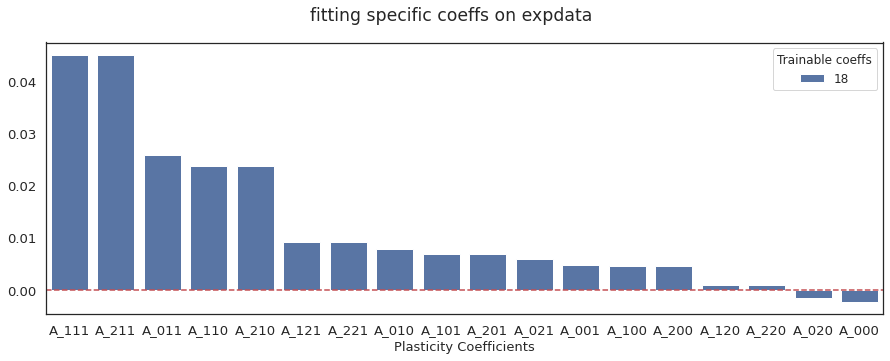

In [89]:
sns.set(font_scale = 1.2)
sns.set_style("white")

fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(15, 5))

fig.suptitle('fitting specific coeffs on expdata', fontsize="large")

axes.axhline(y=0, color='r', linestyle='--')

sns.barplot(data=melted_df, x="coeff_name", y="coeff_val", hue="trainable_coeffs", ax=axes)
axes.set_ylabel(None)
axes.set_xlabel("Plasticity Coefficients", fontsize=13)
axes.legend(
    fontsize='small',
    title='Trainable coeffs',
    title_fontsize='small')


plt.savefig("coeffs-zero-init-binary-input.png", dpi=500)